# Implémentation d'un modèle CNN Keras 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm
import random
data_load = False
from tensorflow import keras
from tensorflow.keras import layers

## Load data

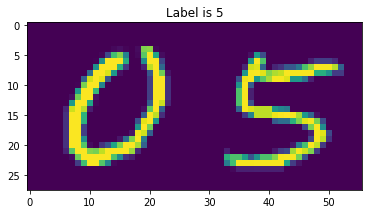

In [3]:
if not data_load :
    train_x = pd.read_csv('./classification-of-mnist-digits/train.csv')
    train_y = pd.read_csv('./classification-of-mnist-digits/train_result.csv')
    test_x = pd.read_csv('./classification-of-mnist-digits/test.csv')
    data_load = True
for i in train_x.index:
    data = train_x.loc[i].values[:-1].reshape(28,56)
    plt.title(f'Label is {train_y.loc[i].values[1]}')
    plt.imshow(data)
    plt.show()
    break

## Traitement des data

In [4]:
train_x = train_x.iloc[: , :-1].to_numpy()
test_x = test_x.iloc[: , :-1].to_numpy()
train_y = np.squeeze(train_y.iloc[:,1:].to_numpy())

In [5]:
train_y = np.squeeze(train_y)

In [6]:
print(train_x.shape, train_y.shape, test_x.shape)

(50000, 1568) (50000,) (10000, 1568)


In [7]:
train_x = np.expand_dims(train_x, -1)
train_x = np.reshape(train_x, (50000, 56, 28, 1), order='C')
test_x = np.expand_dims(test_x, -1)
test_x = np.reshape(test_x, (10000, 56, 28, 1), order='C')

In [8]:
def one_hot(a, num_classes):
  return np.squeeze(np.eye(num_classes)[a.reshape(-1)])
train_y = one_hot(train_y, 19)

In [9]:
print(train_x.shape, train_y.shape, test_x.shape)

(50000, 56, 28, 1) (50000, 19) (10000, 56, 28, 1)


## Construction du modèle

In [26]:
num_classes = 19
input_shape = (56, 28, 1)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 54, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 27, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 25, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 5, 64)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3840)              0         
                                                                 
 dropout_2 (Dropout)         (None, 3840)             

## Entraînement du modèle

In [27]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(train_x, train_y, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
313/313 [==============================] - 50s 153ms/step - loss: 2.0784 - accuracy: 0.3186 - val_loss: 1.5468 - val_accuracy: 0.4949
Epoch 2/15
313/313 [==============================] - 40s 128ms/step - loss: 1.4985 - accuracy: 0.5124 - val_loss: 1.2854 - val_accuracy: 0.5837
Epoch 3/15
313/313 [==============================] - 39s 124ms/step - loss: 1.2902 - accuracy: 0.5829 - val_loss: 1.1302 - val_accuracy: 0.6399
Epoch 4/15
313/313 [==============================] - 39s 123ms/step - loss: 1.1635 - accuracy: 0.6246 - val_loss: 1.0141 - val_accuracy: 0.6804
Epoch 5/15
313/313 [==============================] - 39s 125ms/step - loss: 1.0763 - accuracy: 0.6532 - val_loss: 0.9419 - val_accuracy: 0.7052
Epoch 6/15
313/313 [==============================] - 39s 125ms/step - loss: 1.0161 - accuracy: 0.6722 - val_loss: 0.8908 - val_accuracy: 0.7215
Epoch 7/15
313/313 [==============================] - 39s 125ms/step - loss: 0.9671 - accuracy: 0.6855 - val_loss: 0.8497 - val_ac

## Courbes d'évolution de la loss et de l'accuracy

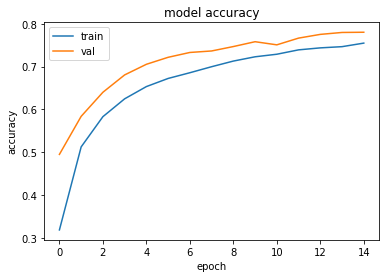

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

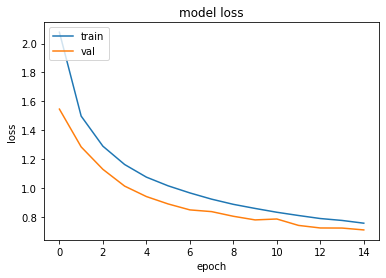

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Prédiction du jeu de test

In [21]:
predict = model.predict(test_x)
predict = np.argmax(predict, axis = 1)
print(predict)

313/313 [==============================] - 7s 19ms/step
[12  7 10 ... 10  4  6]


## Chargement des résultats dans un csv conforme

In [17]:
# creating a list of index names
index_values = [i for i in range(0, 10000)]
# creating a list of column names
column_values = ['Index', 'Class']
  
# creating the dataframe
df = pd.DataFrame(columns = column_values, index = index_values)
df['Class']= predict
df['Index']= index_values
print(df)
df.to_csv('./submission_Keras_Conv.csv', index=False)

      Index  Class
0         0     14
1         1      7
2         2      8
3         3      7
4         4      5
...     ...    ...
9995   9995      9
9996   9996     12
9997   9997     10
9998   9998      4
9999   9999      6

[10000 rows x 2 columns]
